Import essential liabraries &  Load the Dataset

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [58]:
# Load the dataset
df = pd.read_csv("/Users/iambimalk/Desktop/Data Analyst -Takeo/archive (4)/train.csv")

In [59]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Exploratory Data Analysis (EDA)

In [60]:
# View data structure and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

In [61]:
# Check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


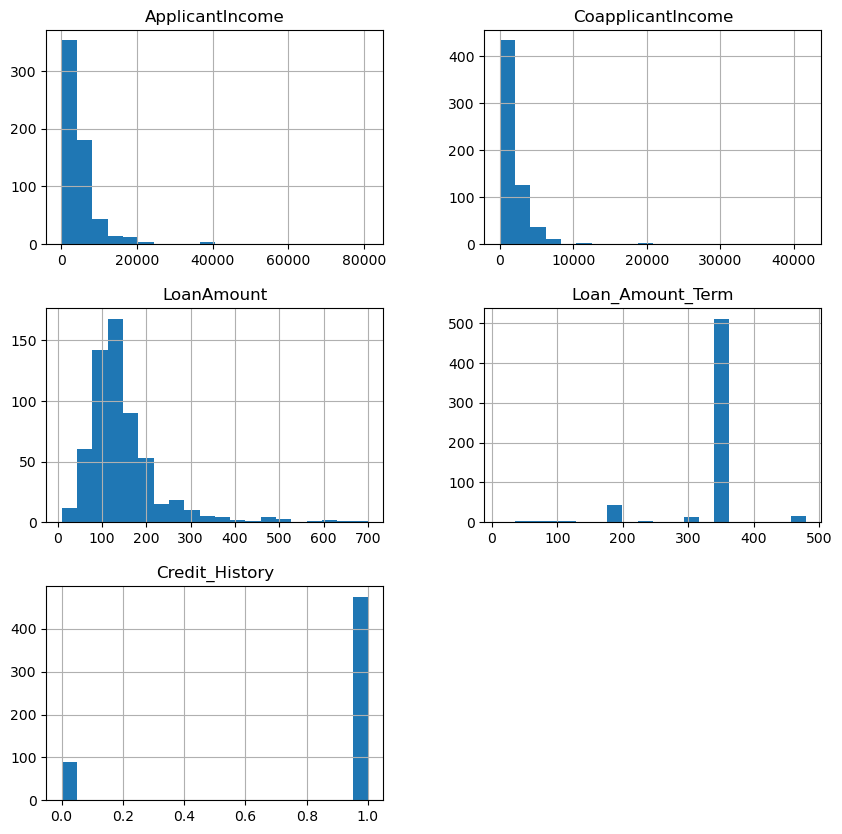

In [62]:
# Visual Analysis
# Histograms for numerical features
df.hist(bins=20, figsize=(10, 10))
plt.show()

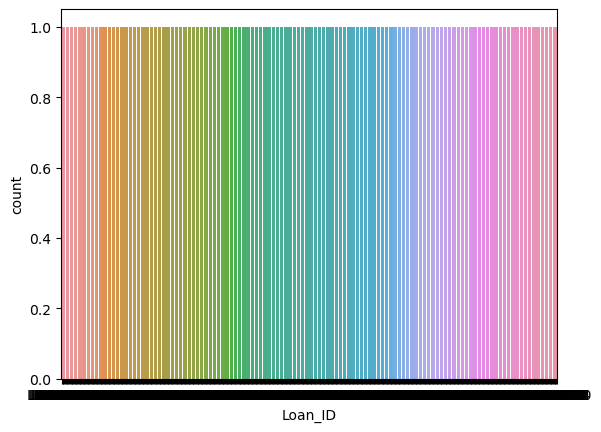

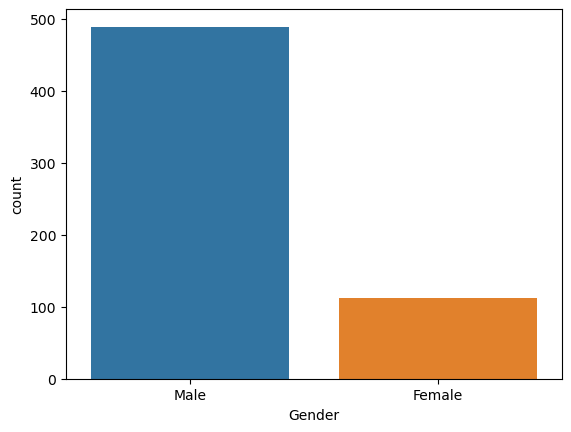

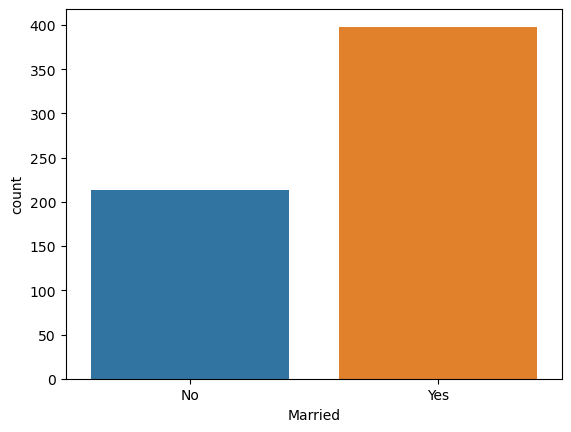

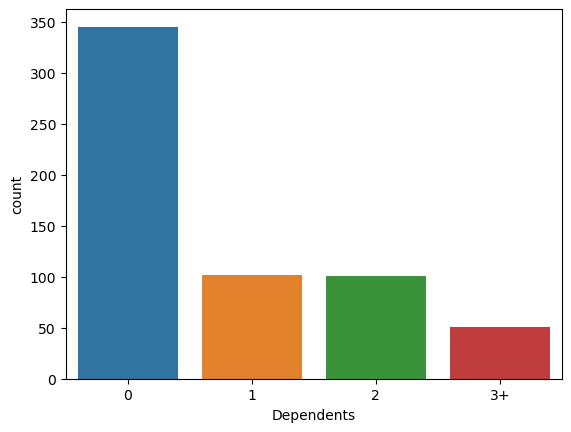

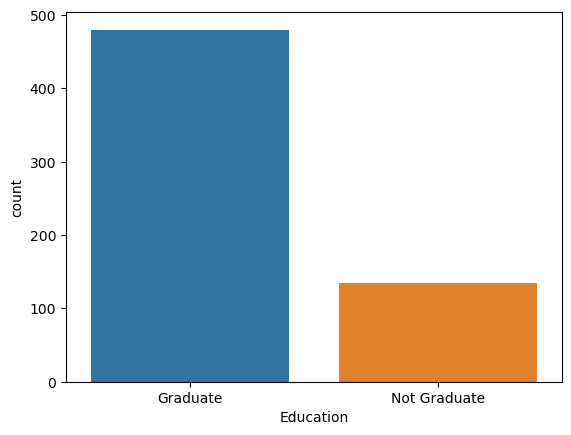

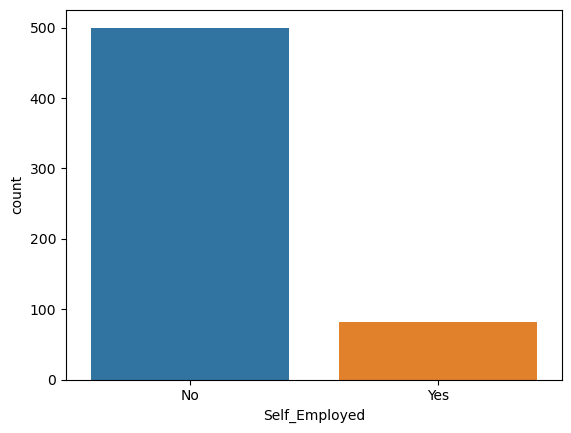

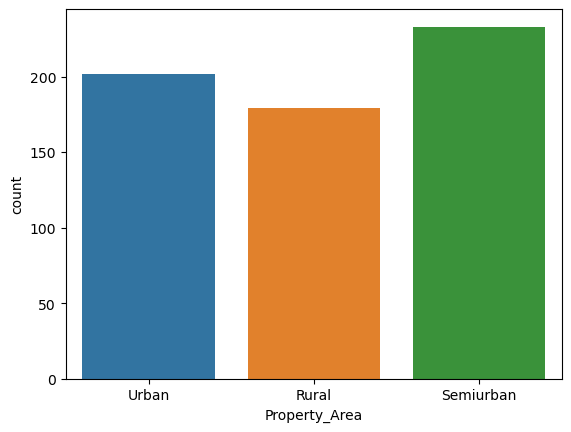

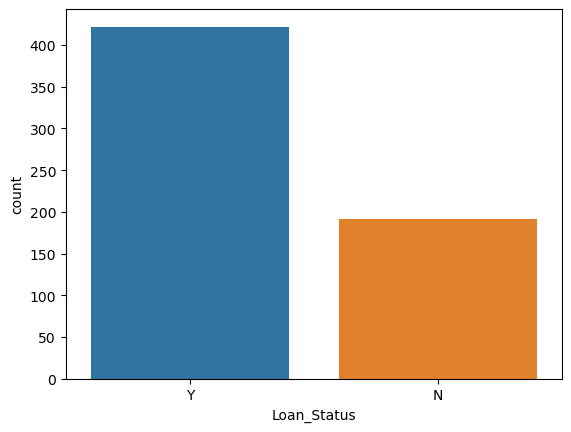

In [63]:
# Count plots for categorical features
for column in df.select_dtypes(include=['object']).columns:
    sns.countplot(x=column, data=df)
    plt.show()

Handle Missing Values

In [64]:
# Replace null values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [65]:
# Replace null values in numerical columns with mean or median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [66]:

# Replace null values in Credit_History (assuming it is categorical/numerical) with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [67]:
# Verify there are no more null values
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Encode Categorical Variables

In [68]:
# Label encode binary categorical columns, one-hot encode multi-class columns
label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# One-hot encoding for remaining categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,1,False,True,False,False,...,False,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,1,False,False,True,False,...,False,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True


Feature Engineering

In [76]:
# Create new features
df['Income_to_Loan_Ratio'] = df['ApplicantIncome'] / df['LoanAmount']
df['Family_Size'] = df['Dependents_3+'] + 1  # Example for families with 3+ dependents



In [77]:

# Check if 'Loan_ID' is a column in the dataset and drop it if present
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)

Feature Selection

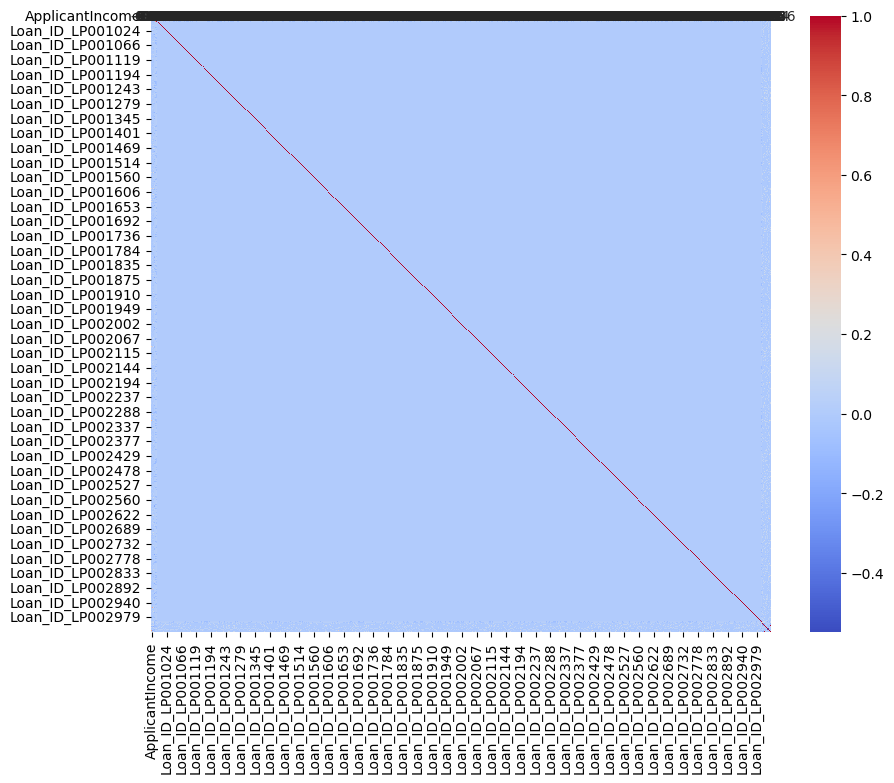

In [78]:
# Correlation matrix to identify highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [83]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [85]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [86]:
# Using Logistic Regression as a baseline model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate baseline model performance
print("Baseline Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Baseline Precision:", precision_score(y_test, y_pred_baseline))
print("Baseline Recall:", recall_score(y_test, y_pred_baseline))
print("Baseline F1 Score:", f1_score(y_test, y_pred_baseline))


Baseline Accuracy: 0.7567567567567568
Baseline Precision: 0.7300613496932515
Baseline Recall: 0.9916666666666667
Baseline F1 Score: 0.8409893992932863


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
# Define a function to print model performance metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}")

# Evaluate baseline model
evaluate_model(baseline_model, X_test, y_test)


Accuracy: 0.7567567567567568
Precision: 0.7300613496932515
Recall: 0.9916666666666667
F1 Score: 0.8409893992932863
Confusion Matrix:
[[ 21  44]
 [  1 119]]


In [88]:
# Trying a more complex model (Random Forest Classifier)
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_test, y_test)


Accuracy: 0.7783783783783784
Precision: 0.7515923566878981
Recall: 0.9833333333333333
F1 Score: 0.8519855595667871
Confusion Matrix:
[[ 26  39]
 [  2 118]]


In [89]:
# Compare models and summarize findings
print("Baseline Model Performance:")
evaluate_model(baseline_model, X_test, y_test)

print("\nRandom Forest Performance:")
evaluate_model(best_rf, X_test, y_test)

# Summarize which feature engineering techniques led to the best performance


Baseline Model Performance:
Accuracy: 0.7567567567567568
Precision: 0.7300613496932515
Recall: 0.9916666666666667
F1 Score: 0.8409893992932863
Confusion Matrix:
[[ 21  44]
 [  1 119]]

Random Forest Performance:
Accuracy: 0.7783783783783784
Precision: 0.7515923566878981
Recall: 0.9833333333333333
F1 Score: 0.8519855595667871
Confusion Matrix:
[[ 26  39]
 [  2 118]]


Summary of Performance Comparison
Accuracy, Precision, and F1 Score all improved in the Random Forest model, suggesting it is better suited for this loan prediction task.
Recall remains very high in both models, meaning both are good at identifying loan approvals, with the Random Forest model being slightly more balanced in precision and recall.
Confusion Matrices show that Random Forest reduced the number of false positives while keeping a high recall, indicating improved reliability in predicting rejections accurately without mislabeling too many actual approvals.
In conclusion, the Random Forest model is a more balanced and reliable model than the baseline, making it a better choice for predicting loan status in this case